In [7]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

# Column space

colspace_p1
[[ -5]
 [-15]]
colspace_p2
[[ 5]
 [15]]


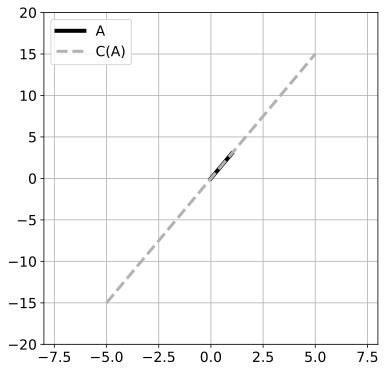

In [8]:
A  = np.array([[1], [3]])

# The column space contains an infinite number of points, but for computational convenience,
# we can draw the line using only two points
xlim = [-5, 5]
colspace_p1 = xlim[0]*A
colspace_p2 = xlim[1]*A

print(f"colspace_p1\n{colspace_p1}\ncolspace_p2\n{colspace_p2}")

plt.figure(figsize=(6,6))
plt.plot([0, A[0,0]], [0, A[1, 0]], "k",
         linewidth=4, label='A')
plt.plot([colspace_p1[0, 0], colspace_p2[0, 0]],
         [colspace_p1[1, 0], colspace_p2[1, 0]],
         '--', linewidth=3, color=[.7,.7,.7], label='C(A)')

plt.xlim([-8, 8])
plt.ylim([-20, 20])
plt.legend()
plt.grid()
# plt.savefig('Figure_06_01.png',dpi=300)
plt.show()


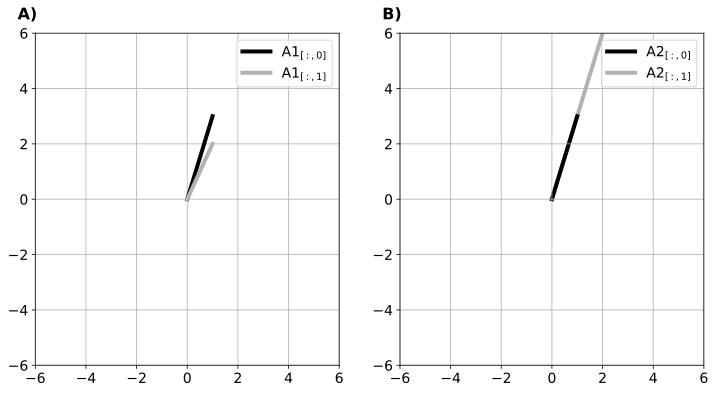

In [9]:
# some matrix
A1  = np.array([[1, 1],
                [3, 2] ])
A2  = np.array([[1, 2],
                [3, 6] ])

# some other plotting specifications
xlim = [-6, 6]
color = [[0,0,0], 
         [.7,.7,.7]]

# make the plot
_, axs = plt.subplots(1,2, figsize=(12, 6))

# loop over columns
for i in range(2):
    # set some axis properties
    axs[0].plot([0, A1[0,i]],
                [0, A1[1,i]], 
                color=color[i], linewidth=4)
    axs[1].plot([0, A2[0,i]],
                [0, A2[1,i]], color=color[i], 
                linewidth=4, zorder=-i)
    
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(xlim)
    axs[i].grid()
    axs[i].text(xlim[0]-.7,
                xlim[1]+.5,
                f'{"AB"[i]})',fontweight='bold',fontsize=16)

# set the legends and subplot letters
for i in [0,1]: 
  axs[i].legend([f'A{i+1}$_{{[:,0]}}$',f'A{i+1}$_{{[:,1]}}$'])

# plt.savefig('Figure_06_02.png',dpi=300)
plt.show()

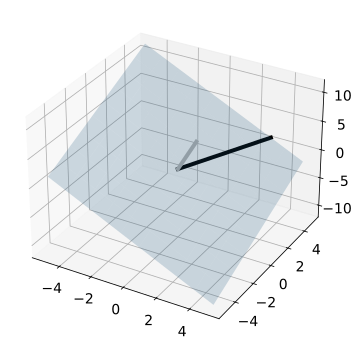

In [10]:
color = [[0,0,0], 
         [.7,.7,.7]]

# a matrix with two columns in R3
A = np.array([[3,0],
              [5,2],
              [1,2]])

# create a 3D graph
ax = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')

# # draw plane corresponding to the column space
xx, yy = np.meshgrid(np.linspace(-5,5,10), np.linspace(-5,5,10))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2]
ax.plot_surface(xx, yy, z1, alpha=.2)

# ## plot the two vectors from matrix S
ax.plot([0, A[0,0]], 
        [0, A[1,0]], 
        [0, A[2,0]], color=color[0],linewidth=4)
ax.plot([0, A[0,1]],
        [0, A[1,1]], 
        [0, A[2,1]],color=color[1],linewidth=4)

# plt.savefig('Figure_06_03.png',dpi=300)
plt.show()

# Exercise 1

The norm of a matrix is related to the scale of the numerical values in the matrix. Create an experiment to demonstrate this. In each of 10 experiment iterations, create a $10 \times 10$ random numbers matrix and compute its Frobenius norm. 

Then repeat this experiment 40 times, each time scalar multiplying the matrix by a different scalar that ranges between 0 and 50. 

The result of the experiment will be a $40 \times 10$ matrix of norms. Figure 6-7 shows the resulting norms, averaged over the 10 experiment iterations. This experiment also illustrates two additional properties of matrix norms: they are strictly nonnegative and can equal 0 only for the zeros matrix.

<p align="center">
  <img src="./imgs/book/plad_0607.png" alt="Example Image">
</p>


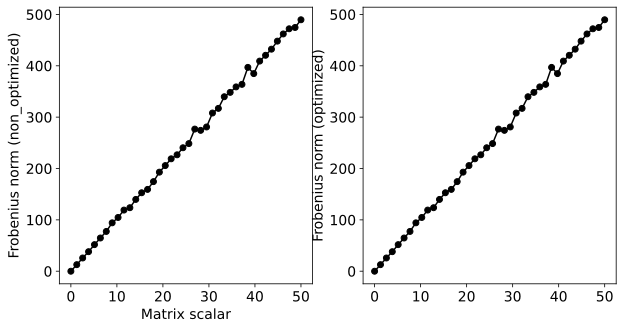

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
# experiment simulations
scalingVals = np.linspace(0,50,40) # range of scaling parameters (0 to 50 in 40 steps)
nExperiments = 10

def non_optimized_calc(scalingVals, nExperiments):
  matrixNorms = np.zeros((len(scalingVals), nExperiments))
  x = {si:[] for si in range(len(scalingVals))}
  for si in range(len(scalingVals)):
    for expi in range(nExperiments):
      
      # generate a random matrix
      r = np.random.randn(10,10)
      x[si].append(r)

      # scale it
      R = r * scalingVals[si]

      # store its norm
      matrixNorms[si,expi] = np.linalg.norm(R, 'fro')
  return matrixNorms, x

def optimized_norms(ScalingVals, x = np.random.randn(40, nExperiments, 10, 10)):
  """
  an optimized version of the matrix norm calculation
  """
  S = ScalingVals[:, np.newaxis, np.newaxis, np.newaxis]
  R = x * S
  matrixNorms = np.linalg.norm(R, "fro", axis=(-2, -1))
  return matrixNorms

MatrixNorms_non_optimized, x = non_optimized_calc(scalingVals, nExperiments)

# for each key in x, there are 10 arrays of 10x10 matrices
# combinne each 10 array of matrices into a single array
# example: x[0] is a list of 10 arrays of 10x10 matrices
# the result: A = np.array([x[0], x[1]....])
R = np.array([x[si] for si in x.keys()])
MatrixNorms_opt = optimized_norms(scalingVals, R)

# check that the results are the same using numpy testing
np.testing.assert_allclose(MatrixNorms_non_optimized, MatrixNorms_opt)

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(scalingVals, np.mean(MatrixNorms_non_optimized, axis=1), "ko-")
axs[0].set_xlabel("Matrix scalar")
axs[0].set_ylabel("Frobenius norm (non_optimized)")
axs[1].plot(scalingVals, np.mean(MatrixNorms_opt, axis=1), "ko-")
axs[1].set_ylabel("Frobenius norm (optimized)")
# plt.savefig('Figure_06_07.png',dpi=300)
plt.show()

# check that norm=0 for zeros matrix
print(MatrixNorms_non_optimized[0,:])

# Exercies 2

Write an algorithm that finds a scalar that brings the Frobenius distance between two matrices to 1. 

Start by writing a Python function that takes two matrices (of the same size) as input and returns the Frobenius distance between them. 

Then create two $N \times N$ random  numbers matrices (I used $N = 7$ in the solutions code, but you can use any other size). 

Create a variable s = 1 that scalar multiplies both matrices. Compute the Frobenius distance between the scaled matrices. 

As long as that distance remains above 1, set the scalar to be .9 times itself and recompute the distance between the scaled matrices. This should be done in a while loop. 

When the Frobenius distance gets below 1, quit the while loop and report the number of iterations (which corresponds to the number of times that the scalar s was multiplied by .9) and the scalar value.

In [3]:
N = 7
s = 1 # scaling factor
it = 0

A = np.random.randn(N,N)
B = np.random.randn(N,N)

def EuclideanDistance(x, y):
    d = x - y
    forb_dist = np.linalg.norm(d, "fro")

    # similar methods to obtain the Euclidean distance
    for m in [np.sqrt(np.dot(d.flatten(), d.flatten())), np.sqrt(np.sum(d**2))]:
        np.testing.assert_allclose(forb_dist, m)
    return forb_dist

while True:
    s_temp = s*.9
    if EuclideanDistance(s_temp*A, s_temp*B) <= 1:
        break
    s = s_temp
    it += 1

print(f"iteration = {it}")
print(f"final value of s = {s:.3f}")
print(f"final distance = {EuclideanDistance(s*A, s*B):.3f}")


iteration = 21
final value of s = 0.109
final distance = 1.079


Text(0, 0.5, 'Count')

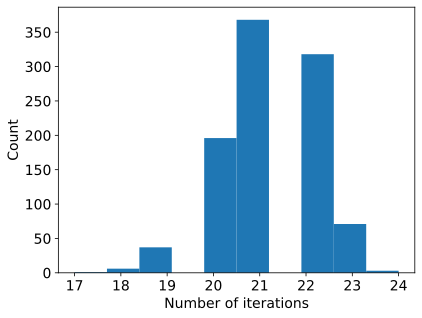

In [4]:
# The code below isn't part of the exercise, just to visualize the distribution of it if we repeat the optimization
# 1000 times
n_iters = np.zeros(1000)

for i in range(1000):
    A = np.random.randn(N,N)
    B = np.random.randn(N,N)

    it, s = 0, 1
    while True:
        s_temp = s*.9
        if EuclideanDistance(s_temp*A, s_temp*B) <= 1:
            break
        s = s_temp
        it += 1
    n_iters[i] = it

plt.hist(n_iters)
plt.xlabel("Number of iterations")
plt.ylabel("Count")

# Exercise 3

Demonstrate that the trace method and the Euclidean formula produce the same result (the Frobenius norm). Does the trace formula work only for $\mathbf{A^{\top}A}$ or do we get the same results for $\mathbf{AA^{\top}}$ 

In [5]:
N = 3
A = np.random.randn(N,N)
At = A.T

np.testing.assert_allclose(np.linalg.norm(A, "fro"), np.sqrt(np.trace(At@A)))
np.testing.assert_allclose(np.linalg.norm(A, "fro"), np.sqrt(np.trace(A@At)))

# Exercise 4
You will explore the impact of shifting a matrix on the norm of that matrix. 

Start by creating a $10 \times 10$ random matrix and compute its Frobenius norm. Then code the following steps inside a for loop: </br>
(1) shift the matrix by a fraction of the norm, </br>
(2) compute the percent change in norm from the original, </br>
(3) compute the Frobenius distance between the shifted and original matrices, and </br>
(4) compute the correlation coefficient between the elements in the matrices </br>
(hint: correlate the vectorized matrices using `np.flatten()`). </br>

The fraction of the norm that you shift by should range from 0 to 1 in 30 linearly spaced steps. Make sure that at each iteration of the loop, you use the original matrix, not the shifted matrix from the previous iteration. You should get a plot that looks like Figure 6-8.

<p align="center">
  <img src="./imgs/book/plad_0608.png" alt="Example Image">
</p>

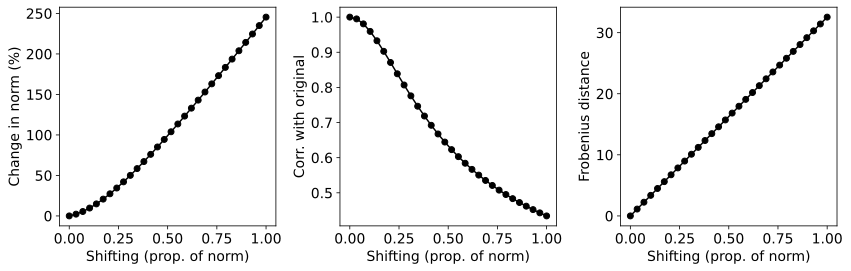

In [6]:
N = 10
shifts = np.linspace(0, 1, 30)

resultsNames = [ 'Change in norm (%)',
                'Corr. with original',
                'Frobenius distance' ]
shiftingResults = np.zeros((len(shifts),3))

A = np.random.randn(N,N)
forb_norm = np.linalg.norm(A, "fro")

for si in range(len(shifts)):
    As = A + shifts[si]*forb_norm*np.eye(N)
    
    # obtain forb_norm of shifted matrix
    forb_norm_shift = np.linalg.norm(As, "fro")

    # calc % difference in norm
    shiftingResults[si,0] = 100*(forb_norm_shift - forb_norm)/forb_norm

    # calc correlation with original matrix
    shiftingResults[si,1] = np.corrcoef(A.flatten(), As.flatten())[0, 1]

    # Frobenius distance
    shiftingResults[si,2] = np.linalg.norm(A - As, "fro")

fig, axs = plt.subplots(1,3, figsize=(12, 4))
for i in range(3):
    axs[i].plot(shifts, shiftingResults[:,i], "ko-")
    axs[i].set_xlabel('Shifting (prop. of norm)')
    axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
# plt.savefig('Figure_06_06.png',dpi=300)
plt.show()

# Exercise 5

To create a $\mathbf{M \times N}$ matrix of rank $r$, multiply a random $\mathbf{M} \times r$ matrix with $r \times \mathbf{M}$. Confirm that the rank is indeed $r$. what happens if $r > \min{\{\mathbf{M, N}\}}$ and why does that happen?

In [7]:
rank = 3
m = 5
n = 6
A = np.random.randn(m, rank)
B = np.random.randn(rank, n)
C = A @ B

print(f"{rank = }")
print(f"C\n{C}")
assert np.linalg.matrix_rank(C) == rank

rank = 10
assert rank > min(m, n)
A = np.random.randn(m, rank)
B = np.random.randn(rank, m)
C = A @ B
print(f"\n{rank = }")
print(f"C\n{C}")
print(f"{rank = }\n{np.linalg.matrix_rank(C) = }\n{np.linalg.matrix_rank(C) != rank = }") 

rank = 3
C
[[ 0.99050355 -0.22888081  1.60817503 -0.02638545 -1.6562217  -0.08992096]
 [ 2.98633891 -0.01864361 -1.35176182 -1.0782107  -1.97084621 -0.17810022]
 [ 0.4418179  -0.38874932 -1.05808635 -0.17885288  0.14724629  0.60138829]
 [ 0.8744826   1.05163752  1.16340358 -0.36889054 -1.38973704 -1.64950398]
 [-6.81837488  2.48507495  3.54249468  1.91670042  4.17070909 -2.79950881]]

rank = 10
C
[[ 4.02802605 -3.51888855 -6.49599536  4.18628058 -1.80035965]
 [ 1.18964318 -0.91347623 -1.66924831 -0.38886367  1.9942466 ]
 [-4.24613833 -0.24206225 -5.69661724 -3.71323668  4.73451207]
 [-1.77899374 -1.82925251 -0.21895432  0.4995571  -1.5111197 ]
 [-1.8667815   1.06507811 -2.85844588  0.64593352 -2.39176951]]
rank = 10
np.linalg.matrix_rank(C) = 5
np.linalg.matrix_rank(C) != rank = True


# Exercise 6

Demonstarte the addtion rule of matrix rank $(r(\mathbf{A + B})\leq r(\mathbf{A}) + r(\mathbf{B}))$ by crateing 3 paris fo rank-1 matrices that have a sum with
- rank-0 </br>
- rank-1 </br>
- rank-2 </br>

Then repeat this using matrix multiplication instead of addition

In [8]:
A = np.diag([1, 0, 0, 0, 0])
B = np.diag([-1,0,0,0,0])
C = A + B

for m in [A, B, C]:
    print(f"{np.linalg.matrix_rank(m) = }")
print()

B = np.zeros(A.shape)
B[0,1] = 10
C = A+B
for m in [A, B, C]:
    print(f"{np.linalg.matrix_rank(m) = }")
print()

B = np.diag([0,1,0,0,0])
C = A+B
for m in [A, B, C]:
    print(f"{np.linalg.matrix_rank(m) = }")

np.linalg.matrix_rank(m) = 1
np.linalg.matrix_rank(m) = 1
np.linalg.matrix_rank(m) = 0

np.linalg.matrix_rank(m) = 1
np.linalg.matrix_rank(m) = 1
np.linalg.matrix_rank(m) = 1

np.linalg.matrix_rank(m) = 1
np.linalg.matrix_rank(m) = 1
np.linalg.matrix_rank(m) = 2


In [9]:
# random matrices have maximum possible rank!
A = np.random.randn(5,1) @ np.random.randn(1,5)
B = np.random.randn(5,1) @ np.random.randn(1,5)
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 2)

# Exercise 7
Put the code from Exercise 6-5 into a Python function that takes parameters M and r as input and provides a random $\mathbf{M \times M}$ rank-r matrix as output. 

In a double for loop, create pairs of $20 \times 20$ matrices with individual ranks varying from 2 to 15.

Add and multiply those matrices, and store the ranks of those resulting matrices. Those ranks can be organized into a matrix and visualized as a function of the ranks of the individual matrices (Figure 6-9).


<p align="center">
  <img src="./imgs/book/plad_0609.png" alt="Example Image">
</p>

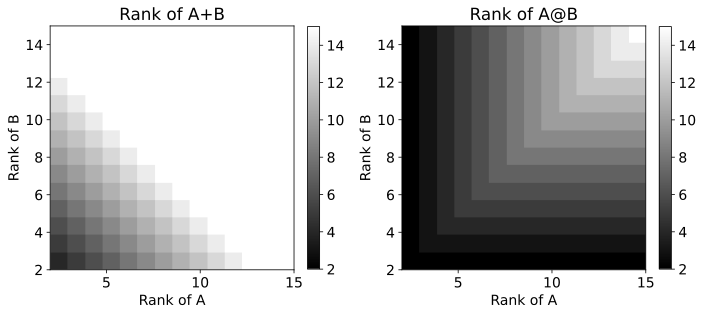

In [10]:
def create_Matrix_rank_r(r, m, n):
    return np.random.randn(m, r) @ np.random.randn(r, n)

m = n = 20
rs = range(2, 16)

Ranks = np.zeros((len(rs) ,len(rs), 2))

for i in range(len(rs)):
    for j in range(len(rs)):
        a = create_Matrix_rank_r(rs[i], m, n) + create_Matrix_rank_r(rs[j], m, n)
        b = create_Matrix_rank_r(rs[i], m, n) @ create_Matrix_rank_r(rs[j], m, n)

        Ranks[i,j,0] = np.linalg.matrix_rank(a)
        Ranks[i,j,1] = np.linalg.matrix_rank(b)

## visualization
fig,axs = plt.subplots(1,2,figsize=(10,6))
s = '+@' # symbols for title

for i in range(2): 
  # draw heatmat
  h = axs[i].imshow(Ranks[:,:,i], vmin=np.min(rs), vmax=np.max(rs),
                    origin='lower',
                    extent=(rs[0],rs[-1],rs[0],rs[-1]), cmap='gray')

  fig.colorbar(h, ax=axs[i], fraction=.045)
  axs[i].set_xlabel('Rank of A')
  axs[i].set_ylabel('Rank of B')
  axs[i].set_title(f'Rank of A{s[i]}B')

# plt.savefig('Figure_06_09.png',dpi=300)
plt.tight_layout()
plt.show()

# Exercise 8

the matrices $\mathbf{A, A^{\top}, A^{\top}A,  \text{ and } AA^{\top}}$ and all have the same rank. Write code to demonstrate this, using random matrices of various sizes, shapes (square, tall, wide), and ranks.

In [11]:
m = 15
n = 8
r =4

a = np.random.randn(m,r) @ np.random.randn(r,n)
at = a.T
assert np.linalg.matrix_rank(a) == r
assert np.linalg.matrix_rank(at) == r
assert np.linalg.matrix_rank(at @ a) == r
assert np.linalg.matrix_rank(a @ at) == r

# Exercise 9

this exercise answers the question $\mathbf{v} \in C(\mathbf{A})$? 

Create a rank-3 matrix $\mathbf{A}\in \mathbb{R^{4\times3}}$ and vector $\mathbf{v} \in \mathbb{R^4}$ using numbers randomly drawn from a normal distribution. 

Follow the algorithm described earlier to determine whether the vector is in the column space of the matrix. </br>
Rerun the code multiple times to see whether you find a consistent pattern. </br>
Next, use a $\mathbf{A} \in \mathbb{R^{4\times 4}}$ rank-4 matrix. I’m willing to betyou always find that $\mathbf{v}\in C(\mathbf{A})$ when $\mathbf{A}$ is $4\times 4$ random matrix (assuming no coding mistakes). What makes me confident about your answer? It is because the column space of a full-rank matrix spans all of $\mathbb{R^M}$, therefore all vectors in $\mathbb{R^M}$ are necessarily in the column space.

For an extra challenge, put this code into a function that returns True or False depending on the outcome of the test, and that raises an exception if the size of the vector does not match for matrix augmentation.

In [23]:
def is_V_inColA(A, v):
    """
    check if vector v is in the column space of matrix A
    """
    if A.shape[0] != v.shape[0]:
        raise Exception('Size mismatch! A and v must have the same column dimensionality!.')
    
    rankA = np.linalg.matrix_rank(A)
    rankA_v = np.linalg.matrix_rank(np.hstack((A, v)))

    return rankA == rankA_v


A = np.random.randn(4, 3)
assert np.linalg.matrix_rank(A) == 3
v = np.random.randn(4, 1)
print(f"{is_V_inColA(A, v) = }")

A = np.random.randn(4, 4)
print(f"{is_V_inColA(A, v) = }")


is_V_inColA(A, v) = False
is_V_inColA(A, v) = True


# Exercise 10

Remember the determinant of a reduced-rank matrix is—​in theory—​zero. In this exercise, you will put this theory to the test. </br>

Implement the following steps: </br>
(1) Create a square random matrix. </br>
(2) Reduce the rank of the matrix. Previously you’ve done this by multiplying rectangular matrices; here, set one column to be a multiple of another column. </br>
(3) Compute the determinant and store its absolute value.</br>

Run these three steps in a double for loop: 
- one loop over matrix sizes ranging from $3 \times 3$ to $30 \times 30$ and 
- a second loop that repeats the three steps one hundred times (repeating an experiment is useful when simulating noise data). 

Finally, plot the determinant, averaged over the one hundred repeats, in a line plot as a function of the number of elements in the matrix. 
Linear algebra theory predicts that that line (that is, the determinants of all the reduced-rank matrices) is zero, regardless of the matrix size. Figure 6-10 shows otherwise, reflecting the computational difficulties with accurately computing the determinant. I log transformed the data for increased visibility; you should inspect the plot using log scaling and linear scaling.

<p align="center">
  <img src="./imgs/book/plad_0610.png" alt="Example Image">
</p>

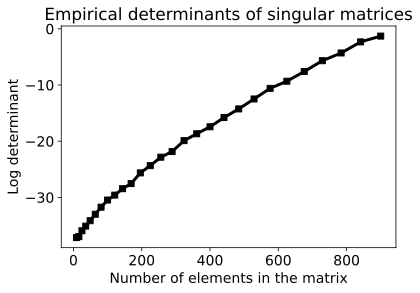

In [27]:
ns = np.arange(3, 31)
iters = 100
dets = np.zeros((len(ns),iters))

for ni in range(len(ns)):
    for i in range(iters):
        A = np.random.randn(ns[ni], ns[ni])

        A[:,0] = A[:,1]

        dets[ni, i] = abs(np.linalg.det(A))

# note: the number of elements in a square matrix is the columns squared
# plotting
plt.figure(figsize=(6,4))
plt.plot(ns**2,np.log(np.mean(dets,axis=1)), 'ks-', linewidth=3)
plt.xlabel('Number of elements in the matrix')
plt.ylabel('Log determinant')
plt.title('Empirical determinants of singular matrices')
# plt.savefig('Figure_06_10.png',dpi=300)
plt.show()

In [24]:
m = 2
A = np.random.rand(m, m)

array([[0.94212771, 0.71008963],
       [0.40034533, 0.36193682]])

In [2]:
import scipy
import numpy as np

A = np.array([1,-1, -2,2]).reshape(2,2)
B = np.array([1,-1,-2,3]).reshape(2,2)

for x in [A, B]:
	b = scipy.linalg.null_space(x)
	print(f"b\n{b}\n")


b
[[0.70710678]
 [0.70710678]]

b
[]

